In [1]:
#!pip install matplotlib 
import os
import cv2
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
def extract_features(img):
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
    resized = cv2.resize(gray, (250, 250))
    features = resized.flatten()
    return features

In [3]:
path='C:\\Users\\KIIT\\Desktop\\DATASET\\train2'

In [4]:
classes=['Bacterial_spot',
 'Early_blight',
 'Late_blight',
 'Leaf_Mold',
 'Septoria_leaf_spot',
 'Spider_mites Two-spotted_spider_mite',
 'Target_Spot',
 'Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato_mosaic_virus',
 'healthy',
 'powdery_mildew']

In [5]:
count=0
data = []
labels = []
for cls in classes:
    folder_path = os.path.join(path, cls)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        # Check if the file is an image file
        if img_path.endswith('.png') or img_path.endswith('.jpg') or img_path.endswith('.jpeg'):
            img = cv2.imread(img_path)
            if img is not None:
                #print("Loaded image:", img_path, "Dimensions:", img.shape, "Type:", img.dtype)
                count=count+1
                features = extract_features(img)
                data.append(features)
                labels.append(cls)
            else:
                print("Error: Failed to load image:", img_path)
        else:
            print("Skipping non-image file:", img_path)

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\00639d29-2d1a-4fcf-9bd3-a2b3109c74c4___UF.GRC_BS_Lab Leaf 1054.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\00728f4d-83a0-49f1-87f8-374646fcda05___GCREC_Bact.Sp 6326.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\00b7e89a-e129-4576-b51f-48923888bff9___GCREC_Bact.Sp 6202.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\01375198-62af-4c40-bddf-f3c11107200b___GCREC_Bact.Sp 5914.JPG
Skipping non-image fil

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\31b7ef25-f27b-4ad3-a2bd-07df9be2d20e___GCREC_Bact.Sp 3765.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\31da1b43-834a-4fb0-8347-e9f27f65fa1f___UF.GRC_BS_Lab Leaf 0836.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\31ebf507-8a9d-42ac-89fa-54cbc98cc1d9___GCREC_Bact.Sp 6388.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\32198276-01c5-4088-bb55-2ccae3c95c87___GCREC_Bact.Sp 3015.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\32231fc1-ec78-45c6-9c7a-8412a7e38a25___GCREC_Bact.Sp 6143.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\325d6d7f-c30b-43a3-8714-74b9cee673b0___GCREC_Bact.Sp 5984.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\328b1cc5-6ac5-4689-9979-78bda50f5eec___GCREC_Bact.Sp 2949.JPG
Skipping non-image fil

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\42aa518f-8005-40bc-9728-a990743c2d5e___GCREC_Bact.Sp 3151.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\42ae82d8-e3d4-4afa-b511-aeb2f25ded63___GCREC_Bact.Sp 5556.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\431d6abc-9adb-4454-a3c6-e6b6a3ec79db___GCREC_Bact.Sp 6045.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\435e0071-a283-4462-b874-a5bf18f5ab4c___GCREC_Bact.Sp 6170.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\4399f133-0078-4099-9ddb-605bbb84cf8c___GCREC_Bact.Sp 3216.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\43a474b7-83dd-48e5-962a-783727a6595a___GCREC_Bact.Sp 3255.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\43b71f8a-175a-4847-a2c8-69c7d2f59f10___GCREC_Bact.Sp 3476.JPG
Skipping non-image file: C:

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\b0049dbf-cdef-4a85-b6e1-b37ed6bc4cfa___UF.GRC_BS_Lab Leaf 0696.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\b042ebf8-61a8-4b00-a544-0704f299e96f___GCREC_Bact.Sp 5954.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\b070b4e5-934e-4dc3-baf0-3f9419eecb86___GCREC_Bact.Sp 5648.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\b0827469-6ac0-4a9e-baca-ac4763b00f95___GCREC_Bact.Sp 5866.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\b0a3026d-9c2e-4615-9e1a-0f14c27632bb___GCREC_Bact.Sp 5902.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\b0a74f61-0012-4b6c-b528-bbce1b79c588___GCREC_Bact.Sp 3805.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Bacterial_spot\b0fc7984-f1bf-4d50-b495-0a363445158f___UF.GRC_BS_Lab Leaf 9102.JPG
Skipping non-imag

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\0034a551-9512-44e5-ba6c-827f85ecc688___RS_Erly.B 9432.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\00c5c908-fc25-4710-a109-db143da23112___RS_Erly.B 7778.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\00e7c4b2-3005-4558-9cfa-235e356cb7a8___RS_Erly.B 7844.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\0114f7b3-7f56-4bef-aa47-7a82da142d4b___RS_Erly.B 7437_180deg.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\0114f7b3-7f56-4bef-aa47-7a82da142d4b___RS_Erly.B 7437_flipTB.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\011aa278-a39e-40b0-b6e4-2e2f835889f0___RS_Erly.B 8251.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\01861c93-ea8b-4820-aaa8-cc6003b3e75b___RS_Erly.B 7855.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\10a46a0b-debe-49f9-8562-c7c81855160e___RS_Erly.B 6339.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\10c1d7a4-bd14-4961-9b96-c7047589eccd___RS_Erly.B 7552.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\10e7dcfd-2cbc-4623-ba9f-94f0e2e4fe13___RS_Erly.B 7648.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\10fedb70-9786-4623-a32b-97a622037511___RS_Erly.B 7796.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\113562f3-fe24-4b28-9ec8-7ca432bded47___RS_Erly.B 9402_180deg.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\113562f3-fe24-4b28-9ec8-7ca432bded47___RS_Erly.B 9402_flipTB.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\11922494-321b-4742-afbe-f6db6a8b4005___RS_Erly.B 9392_flipTB.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\D

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\203d84bc-4acc-4cad-b4f9-f659ae641876___RS_Erly.B 7615.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\203d84bc-4acc-4cad-b4f9-f659ae641876___RS_Erly.B 7615_180deg.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\20459a26-c07a-4592-baf8-6d4172c23cec___RS_Erly.B 8358_180deg.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\20459a26-c07a-4592-baf8-6d4172c23cec___RS_Erly.B 8358_flipTB.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\20a276c8-90b5-475f-811b-1d63f34f1c10___RS_Erly.B 9551.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\2165f0a3-1265-491d-ad8a-e53102a87e9b___RS_Erly.B 9376.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\2165f0a3-1265-491d-ad8a-e53102a87e9b___RS_Erly.B 9376_180deg.JPG
Skipping non-image file: C:\Users\KIIT\De

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\50cd977c-9fa8-4ff2-9a82-9d848f0a8972___RS_Erly.B 7683.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\50cd977c-9fa8-4ff2-9a82-9d848f0a8972___RS_Erly.B 7683_180deg.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\50cd977c-9fa8-4ff2-9a82-9d848f0a8972___RS_Erly.B 7683_flipTB.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\511fb1ba-bef6-4144-9e05-461a66022cba___RS_Erly.B 8435.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\511fb1ba-bef6-4144-9e05-461a66022cba___RS_Erly.B 8435_flipTB.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\51708fa7-4619-4957-bfc6-8e422ee23a99___RS_Erly.B 7630.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Early_blight\51708fa7-4619-4957-bfc6-8e422ee23a99___RS_Erly.B 7630_flipTB.JPG
Skipping non-image file: C:\Users\KIIT\De

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\0ba7d3d8-5c4c-4365-ba0c-69f61e96a36e___RS_Late.B 5312_flipLR.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\0bb05a47-55a2-4c23-9dd2-3a5abf17c9f4___GHLB Leaf 5 Day 1.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\0c192fbe-38eb-4abb-a858-8bc39942a3ef___RS_Late.B 6076.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\0c192fbe-38eb-4abb-a858-8bc39942a3ef___RS_Late.B 6076_flipLR.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\0c3153b2-0e64-41b6-902a-66eafbf7cae6___GHLB Leaf 4.1 Day 1.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\0c3153b2-0e64-41b6-902a-66eafbf7cae6___GHLB Leaf 4.1 Day 1_flipLR.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\0c47de5b-adbe-479f-8ccf-5b8c530c32f8___RS_Late.B 6312.JPG
Skipping non-image file: C:\Users\KIIT\Des

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\1905cdb8-1725-4386-9d49-59f47c3e4a1b___GHLB2ES Leaf 65.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\1909260c-1e08-4a8f-a702-60549ada08b2___RS_Late.B 6671.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\19b2b71e-d648-46fb-921d-a7858a1c67c7___GHLB2 Leaf 9102.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\19bfccfd-5df8-41be-910e-2c5f3eae3573___GHLB2 Leaf 8597.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\19f3e2cd-2900-4043-bb15-31a0098d26b9___RS_Late.B 5197.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\1a33a1fd-d077-4cf6-84ac-7825176e25d2___GHLB2 Leaf 8969.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\1a473cad-42fc-48ca-963c-d438fbca928f___RS_Late.B 5418.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_bligh

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\1f38b254-2338-4e4a-b772-2a8e60ca8bc0___GHLB2 Leaf 121.3_flipLR.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\1f73406a-14e8-4be2-8450-9379d4f9b2b5___GHLB2 Leaf 9062.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\1f8743b6-f385-4464-9e41-48bd9fe85637___GHLB2 Leaf 8914.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\1f8743b6-f385-4464-9e41-48bd9fe85637___GHLB2 Leaf 8914_flipLR.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\1fa37cd4-066e-4deb-ab99-5fa8dcc4481c___RS_Late.B 5454.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\2018ff03-69eb-437f-96e2-f51801042c32___RS_Late.B 6157.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\2054e9b6-19eb-4066-b384-83e6f6ef2690___GHLB2 Leaf 8565.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\t

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\30f95811-1559-4076-a66b-25e3209c7db6___GHLB2ES Leaf 136.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\31514f29-0b4c-4d5a-bd8b-cb0e1264bf48___RS_Late.B 6087.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\3152f2ab-94e6-4e06-8fb9-568c45d31b0b___RS_Late.B 6175.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\317f01bd-bf08-43b2-b269-48a6fa2fd480___RS_Late.B 4854.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\319d4c9a-92d4-41ff-b351-f3d439233c9e___RS_Late.B 6357.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\31ba9bec-b1f2-49ee-b531-df197dc83ac5___GHLB2 Leaf 116.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\31df9041-c8b0-4ebb-93f7-cdac5338723b___GHLB Leaf 3.1 Day 1.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_bl

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\3db1dcda-3180-432a-9b8e-7ba8a0d6be55___GHLB_PS Leaf 28.3 Day 13_flipLR.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\3dcee9ed-43bb-45a9-8cff-641b3dd62179___RS_Late.B 5324_flipLR.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\3de17184-cbec-4397-813e-1bbc3bc5cb6a___RS_Late.B 7050.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\3de17184-cbec-4397-813e-1bbc3bc5cb6a___RS_Late.B 7050_flipLR.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\3de67462-9ae4-455d-8d0d-a625c92c7120___RS_Late.B 5148.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\3de67462-9ae4-455d-8d0d-a625c92c7120___RS_Late.B 5148_flipLR.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Late_blight\3e01dcb7-e660-4403-861a-59a44d572565___GHLB Leaf 2 Day 7.JPG
Skipping non-image file: C:\Users\K

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Leaf_Mold\156f079b-411f-41db-8023-fa934de343f9___Crnl_L.Mold 7039.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Leaf_Mold\156f079b-411f-41db-8023-fa934de343f9___Crnl_L.Mold 7039_flipTB.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Leaf_Mold\158d72b9-7f14-4466-9b20-13909636294f___Crnl_L.Mold 8829.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Leaf_Mold\158d72b9-7f14-4466-9b20-13909636294f___Crnl_L.Mold 8829_180deg.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Leaf_Mold\15b7a74c-2c9d-41e5-bcc6-799471cd8e43___Crnl_L.Mold 6616.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Leaf_Mold\16081062-4baf-4be7-923b-d197803282da___Crnl_L.Mold 8686_180deg.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Leaf_Mold\16081062-4baf-4be7-923b-d197803282da___Crnl_L.Mold 8686_flipTB.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\D

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Septoria_leaf_spot\20c3bfbf-a2c7-425c-9ad7-bd1ec8f3b181___JR_Sept.L.S 2656.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Septoria_leaf_spot\211aafec-c358-4573-abe9-72eb49936ba5___JR_Sept.L.S 8558.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Septoria_leaf_spot\212c8703-4c56-4c2b-a1d0-1047a758ca93___Keller.St_CG 1786.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Septoria_leaf_spot\2139cc43-0f52-4782-9966-059e4538b624___JR_Sept.L.S 2653.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Septoria_leaf_spot\213cae74-0bfd-4b12-99c8-4ec8bdc69433___Matt.S_CG 2555.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Septoria_leaf_spot\2142a16f-dd81-4045-8ea8-1bb853595821___JR_Sept.L.S 2523.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Septoria_leaf_spot\215cf2c7-52ad-42ab-bed5-09269c51e63d___Keller.St_CG 1801.JPG
Skipping non-

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_Yellow_Leaf_Curl_Virus\139008b7-e1be-4de4-84b1-763758c94f5f___UF.GRC_YLCV_Lab 02561.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_Yellow_Leaf_Curl_Virus\13901a18-a9bf-48d7-a1a7-c6afd7d6bf87___YLCV_NREC 0130.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_Yellow_Leaf_Curl_Virus\1396357a-c61b-4be6-af3e-f79080f509fd___UF.GRC_YLCV_Lab 03319.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_Yellow_Leaf_Curl_Virus\14034780-0670-4484-be42-cb2b12607c40___YLCV_NREC 2898.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_Yellow_Leaf_Curl_Virus\1413021e-6fcb-40e1-8802-0eb38f0c0593___YLCV_GCREC 5254.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_Yellow_Leaf_Curl_Virus\14804695-4a72-4be7-aa85-d675f6c6ff02___YLCV_GCREC 2469.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_Yellow_Leaf_Cur

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_Yellow_Leaf_Curl_Virus\28899d66-3369-4096-8a03-78f1cba5d611___YLCV_GCREC 2627.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_Yellow_Leaf_Curl_Virus\289149ff-3482-4aad-a4d8-9da766a02650___YLCV_GCREC 2693.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_Yellow_Leaf_Curl_Virus\29183200-002b-40e4-9dc1-cbe58eddc4b6___YLCV_NREC 2244.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_Yellow_Leaf_Curl_Virus\292880f6-581b-43c3-9093-da727e219c1a___UF.GRC_YLCV_Lab 02129.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_Yellow_Leaf_Curl_Virus\292911d9-012e-422d-93ba-3e8ef50a749f___YLCV_NREC 0141.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_Yellow_Leaf_Curl_Virus\2935267e-a35b-42aa-a97c-c32665afe48a___YLCV_NREC 2885.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_Yellow_Leaf_Curl_Virus

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_Yellow_Leaf_Curl_Virus\53578c92-d46e-4d7d-950e-66ad61da023a___UF.GRC_YLCV_Lab 01618.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_Yellow_Leaf_Curl_Virus\53788a56-dfa1-4761-a4d7-0ae813a0b18b___YLCV_NREC 0118.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_Yellow_Leaf_Curl_Virus\53881cde-cbe3-4d32-87f6-9980cd247508___UF.GRC_YLCV_Lab 02531.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_Yellow_Leaf_Curl_Virus\53898660-51c9-42de-99c0-381c38dc02e6___UF.GRC_YLCV_Lab 02778.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_Yellow_Leaf_Curl_Virus\542641d4-51a1-4356-83b4-fbb4e8733c93___YLCV_GCREC 5482.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_Yellow_Leaf_Curl_Virus\54447f20-dc92-409b-b831-6b2a2449adf9___UF.GRC_YLCV_Lab 03346.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_Ye

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_mosaic_virus\3117475d-3948-45a5-b2c7-630efb8bfab8___PSU_CG 2333_90deg.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_mosaic_virus\3117475d-3948-45a5-b2c7-630efb8bfab8___PSU_CG 2333_new30degFlipLR.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_mosaic_virus\3117475d-3948-45a5-b2c7-630efb8bfab8___PSU_CG 2333_newPixel25.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_mosaic_virus\32a6609d-e858-4da0-a153-b59b4de976b7___PSU_CG 2061.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_mosaic_virus\32a6609d-e858-4da0-a153-b59b4de976b7___PSU_CG 2061_270deg.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_mosaic_virus\32a6609d-e858-4da0-a153-b59b4de976b7___PSU_CG 2061_90deg.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\Tomato_mosaic_virus\32a6609d-e858-4da0-a153-b59b4de976b7___PSU_CG 2061_

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\healthy\10716d69-324b-4423-9e1e-b09559babb89___GH_HL Leaf 267.1.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\healthy\10a4a3bd-e4c3-4e1c-94bd-cd0cd4e2705b___GH_HL Leaf 526.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\healthy\115c8bc1-06b9-4679-9159-46e5640c39e7___GH_HL Leaf 206.2.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\healthy\11fe6fbc-a1a9-4cc4-ba85-a6864a4e9bae___GH_HL Leaf 280.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\healthy\125ff07a-87f1-4953-9ded-8f9e5adb7b1b___RS_HL 0470.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\healthy\12c28bfa-a576-4787-8d4e-a500ac446766___RS_HL 0526.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\healthy\12f2989a-82c7-41d1-ae23-93a6e85bfd57___RS_HL 9798.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\healthy\13053341-b112-411c-bc76-8cadbcb4eded___GH_

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\healthy\20249fbb-29c5-40fb-985e-5a0b9f0e67b1___RS_HL 0117.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\healthy\202825fe-3d0b-4c86-aea3-15604e2efed4___RS_HL 9694.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\healthy\203dd699-5df7-4f6d-ad63-d1557033f04a___RS_HL 9788.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\healthy\20b835ac-a3bb-48ce-bb0d-5eb9a0d6ca56___RS_HL 9772.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\healthy\20d3ba25-f161-4ede-a42a-7a3020ebda3d___RS_HL 0124.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\healthy\21d294dd-0c03-457d-a02d-1243bdf0ff4f___RS_HL 9887.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\healthy\21f1c16d-2d7f-44e6-a2e4-7d830dfbfda3___RS_HL 9996.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\healthy\22356f83-9bb2-4b42-9283-bbf8e0dffba0___RS_HL 0430.JPG
Skipping

Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\powdery_mildew\pm12.JPG
Skipping non-image file: C:\Users\KIIT\Desktop\DATASET\train2\powdery_mildew\pm14.JPG


In [6]:
count

524

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [8]:
modle = DecisionTreeClassifier(random_state=42)
modle.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
y_pred = modle.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6952380952380952


In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:

X_train = np.array(X_train)
y_test = np.array(y_test)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

RandomForestClassifier(random_state=42)

In [13]:
model.score(X_test,y_test)

0.7619047619047619

In [14]:
from sklearn.svm import SVC

In [15]:
model2=SVC()

In [16]:
model2.fit(X_train,y_train)

SVC()

In [17]:
model2.score(X_test,y_test)

0.7619047619047619

In [18]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [22]:
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_data_gen = ImageDataGenerator(rescale=1./255)
train_generator = train_data_gen.flow_from_directory(
    'C:\\Users\\KIIT\\Desktop\\DATASET\\train2',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 4638 images belonging to 11 classes.


In [23]:
validation_generator = train_data_gen.flow_from_directory(
    'C:\\Users\\KIIT\\Desktop\\DATASET\\train2',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1154 images belonging to 11 classes.


In [32]:
test_generator = test_data_gen.flow_from_directory(
    'C:\\Users\\KIIT\\Desktop\\DATASET\\train2',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 5792 images belonging to 11 classes.


In [25]:
CNN = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(11, activation='softmax')
])

CNN.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [26]:
history = CNN.fit(
    train_generator,               
    
    epochs=25,
    batch_size=32,
    validation_data=validation_generator
)

Epoch 1/25
145/145 [==============================] - 883s 6s/step - loss: 1.8004 - accuracy: 0.3816 - val_loss: 1.1871 - val_accuracy: 0.6187
Epoch 2/25
145/145 [==============================] - 624s 4s/step - loss: 1.0193 - accuracy: 0.6404 - val_loss: 0.8893 - val_accuracy: 0.7080
Epoch 3/25
145/145 [==============================] - 636s 4s/step - loss: 0.8118 - accuracy: 0.7139 - val_loss: 0.8541 - val_accuracy: 0.7114
Epoch 4/25
145/145 [==============================] - 728s 5s/step - loss: 0.5982 - accuracy: 0.7913 - val_loss: 0.7581 - val_accuracy: 0.7582
Epoch 5/25
145/145 [==============================] - 686s 5s/step - loss: 0.4239 - accuracy: 0.8549 - val_loss: 0.6737 - val_accuracy: 0.7929
Epoch 6/25
145/145 [==============================] - 651s 4s/step - loss: 0.2818 - accuracy: 0.9034 - val_loss: 0.7070 - val_accuracy: 0.7981
Epoch 7/25
145/145 [==============================] - 708s 5s/step - loss: 0.2480 - accuracy: 0.9185 - val_loss: 0.7380 - val_accuracy: 0.7998

In [33]:
test_loss, test_acc = CNN.evaluate(test_generator)

181/181 [==============================] - 208s 1s/step - loss: 0.2710 - accuracy: 0.9579


In [34]:
test_acc

0.9578729271888733

In [35]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [36]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'traing and validation accuracy')

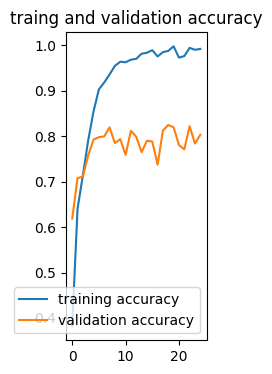

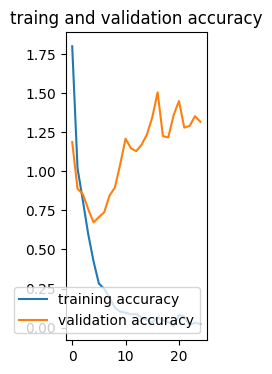

In [44]:
epochs=25
plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
plt.plot(range(epochs),acc,label='training accuracy')
plt.plot(range(epochs),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('traing and validation accuracy')

plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
plt.plot(range(epochs),loss,label='training accuracy')
plt.plot(range(epochs),val_loss,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('traing and validation accuracy')

In [49]:
decision_tree=0.69
random_forest=0.76
svm=0.76
cnn=0.95

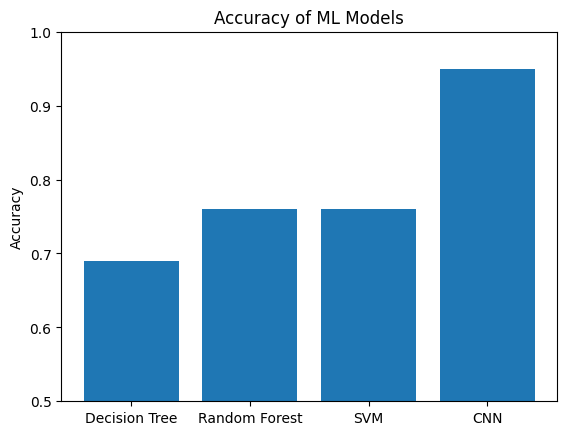

In [53]:
models = ['Decision Tree', 'Random Forest', 'SVM', 'CNN']
accuracies = [decision_tree, random_forest, svm, cnn]

plt.bar(models, accuracies)
plt.ylim([0.5, 1.0])
plt.ylabel('Accuracy')
plt.title('Accuracy of ML Models')


plt.show()


In [72]:
from tensorflow.keras.preprocessing import image
img_path = 'C:/Users/KIIT/Downloads/Telegram Desktop/00a7c269-3476-4d25-b744-44d6353cd921___GCREC_Bact.Sp 5807.JPG'
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array/255.0

prediction = CNN.predict(img_array)
predicted_class = np.argmax(prediction)
classes[predicted_class]

1/1 [==============================] - 0s 172ms/step


'Bacterial_spot'

In [67]:
from tensorflow.keras.models import load_model, save_model

# assuming you have a model object named "model"
save_model(CNN, 'C:/Users/KIIT/Desktop/DATASET/model/model1.h5')